In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

***Create Tools***

1. Arxiv Research Paper Tool

In [10]:
arxiv_api_wrapper = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=arxiv_api_wrapper, description="Query arxiv papers")

print(arxiv.name)

arxiv


In [11]:
arxiv

ArxivQueryRun(description='Query arxiv papers', api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=2, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=500))

In [12]:
# Search for a Research paper

arxiv.invoke("Attention is all you need")

'Published: 2021-05-06\nTitle: Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet\nAuthors: Luke Melas-Kyriazi\nSummary: The strong performance of vision transformers on image classification and other vision tasks is often attributed to the design of their multi-head attention layers. However, the extent to which attention is responsible for this strong performance remains unclear. In this short report, we ask: is the attention layer even necessary? Specifi'

2. Wikipedia Search

In [17]:
wiki_api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=wiki_api_wrapper)

print(wiki.name)

wikipedia


3. Tavily Search

In [18]:
from dotenv import load_dotenv, find_dotenv
import os
from langchain_ollama import ChatOllama
from langchain_community.tools.tavily_search import TavilySearchResults

In [23]:
tavily_key = os.getenv('TAVILY_API_KEY')
_ = load_dotenv(find_dotenv())

llm = ChatOllama(model="gpt-oss:20b-cloud", temperature=0)

In [21]:
tavily_search = TavilySearchResults(max_results=3)
search_docs = tavily_search.invoke("Tell me the most recent AI News")

print(search_docs)

[{'title': 'AI News & Artificial Intelligence | TechCrunch', 'url': 'https://techcrunch.com/category/artificial-intelligence/', 'content': "### Meta centralizes Facebook and Instagram support, tests AI support assistant\n\nThe Meta Platforms Inc. pavilion ahead of the World Economic Forum (WEF) in Davos, Switzerland, on Jan. 19, 2025.\n\n### Meta reportedly plans to slash Metaverse budget by up to 30%\n\nAnthropic\n\n### Anthropic signs $200M deal to bring its LLMs to Snowflake’s customers\n\nWhatsApp logo reflected on sunglasses and displayed on a phone screen. [...] ### AWS re:Invent was an all-in pitch for AI. Customers might not be ready.\n\nAn image of a woman holding a cell phone in front of a Perplexity AI logo displayed on a computer screen.\n\n### The New York Times is suing Perplexity for copyright infringement\n\nThe Meta Platforms Inc. pavilion ahead of the World Economic Forum (WEF) in Davos, Switzerland, on Jan. 19, 2025.\n\n### Meta signs commercial AI data agreements wi

***invoke llm with tools (Tool Calling)***

In [22]:
tools = [arxiv, wiki, tavily_search]

In [24]:
llm_with_tools = llm.bind_tools(tools=tools)

In [25]:
llm_with_tools.invoke('what is the latest news on AI Agents and MCPs')    # llm called tavily tool

AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'gpt-oss:20b-cloud', 'created_at': '2025-12-08T03:39:51.839911567Z', 'done': True, 'done_reason': 'stop', 'total_duration': 937554235, 'load_duration': None, 'prompt_eval_count': 258, 'prompt_eval_duration': None, 'eval_count': 70, 'eval_duration': None, 'model_name': 'gpt-oss:20b-cloud'}, id='run--65e22719-1135-4e01-aa3c-bd1a227193db-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'latest news AI Agents MCPs'}, 'id': '4dafeb39-1b95-42e6-83ea-4a6082f9b532', 'type': 'tool_call'}], usage_metadata={'input_tokens': 258, 'output_tokens': 70, 'total_tokens': 328})

In [27]:
llm_with_tools.invoke('What is the latest research on Quantum Computing?')    # llm called arxiv tool

AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'gpt-oss:20b-cloud', 'created_at': '2025-12-08T04:04:46.863469998Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1043496606, 'load_duration': None, 'prompt_eval_count': 256, 'prompt_eval_duration': None, 'eval_count': 73, 'eval_duration': None, 'model_name': 'gpt-oss:20b-cloud'}, id='run--d2e9cb81-6347-40b9-9f1c-2e1759256bcc-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing 2025 arxiv'}, 'id': 'a6b2eb18-a534-4ea5-9e62-8b4fc54e0fe3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 256, 'output_tokens': 73, 'total_tokens': 329})

In [28]:
llm_with_tools.invoke('What is Machine learning')    # llm called wikipedia tool

AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'gpt-oss:20b-cloud', 'created_at': '2025-12-08T04:07:54.445309888Z', 'done': True, 'done_reason': 'stop', 'total_duration': 790551661, 'load_duration': None, 'prompt_eval_count': 251, 'prompt_eval_duration': None, 'eval_count': 47, 'eval_duration': None, 'model_name': 'gpt-oss:20b-cloud'}, id='run--c0b3e4ac-0f71-448b-8b46-d9355e30c5a3-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine learning'}, 'id': 'f4710624-e3b6-447c-8295-da8fb9d95981', 'type': 'tool_call'}], usage_metadata={'input_tokens': 251, 'output_tokens': 47, 'total_tokens': 298})

### Create LangGrapgh Workflow

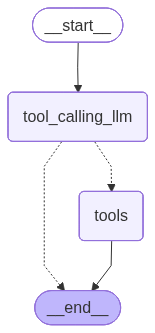

In [35]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# AI Assitant Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

***Invoke the Graph***

In [36]:
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content="what is the latest news on AI Agents and MCPs")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the latest news on AI Agents and MCPs
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (ddee23ce-3b66-4b43-8f63-137f8322fcb2)
 Call ID: ddee23ce-3b66-4b43-8f63-137f8322fcb2
  Args:
    query: latest news AI Agents MCPs
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The Future of AI Agents, MCPs and Deployment, with Lean MCP ...", "url": "https://www.youtube.com/watch?v=GTLV6f2LRnU", "content": "Joined by Joshua Miller and Darnel Green, we explore why MCP is becoming the new standard for AI tool integration and why most SaaS teams", "score": 0.9986853}, {"title": "AI Customer Experience in 2025: Agents, MCPs & RAG - Inkeep", "url": "https://inkeep.com/blog/AI-Customer-Experience", "content": "Therefore, breaking work into specialized agents keeps i

In [38]:
from langchain_core.messages import HumanMessage

new_message = [HumanMessage(content='What is the latest research on Quantum Computing')]
new_message = graph.invoke({'messages':new_message})

for n in new_message['messages']:
    n.pretty_print()

================================ Human Message =================================

What is the latest research on Quantum Computing
================================== Ai Message ==================================
Tool Calls:
  arxiv (55db44a5-182f-4cb9-9938-e310fa002b52)
 Call ID: 55db44a5-182f-4cb9-9938-e310fa002b52
  Args:
    query: quantum computing 2025 arxiv
================================= Tool Message =================================
Name: arxiv

Published: 2025-04-07
Title: Quantum Computing: Vision and Challenges
Authors: Sukhpal Singh Gill, Oktay Cetinkaya, Stefano Marrone, Daniel Claudino, David Haunschild, Leon Schlote, Huaming Wu, Carlo Ottaviani, Xiaoyuan Liu, Sree Pragna Machupalli, Kamalpreet Kaur, Priyansh Arora, Ji Liu, Ahmed Farouk, Houbing Herbert Song, Steve Uhlig, Kotagiri Ramamohanarao
Summary: The recent development of quantum computing, which uses entanglement, superposition, and other quantum fundamental concepts, can 


In [39]:
from langchain_core.messages import HumanMessage

new_message = [HumanMessage(content='1706.03762')]
new_message = graph.invoke({'messages':new_message})

for n in new_message['messages']:
    n.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (9475d9a9-1fe2-4af5-bdbb-54f182d2f78f)
 Call ID: 9475d9a9-1fe2-4af5-bdbb-54f182d2f78f
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, base


In [40]:
from langchain_core.messages import HumanMessage

new_message = [HumanMessage(content='Hello, My name is Emmanuel')]
new_message = graph.invoke({'messages':new_message})

for n in new_message['messages']:
    n.pretty_print()

================================ Human Message =================================

Hello, My name is Emmanuel
================================== Ai Message ==================================

Hello Emmanuel! How can I help you today?
